# 数字图像处理Demo演示

In [2]:
import os

from modules.layout import Layout
from modules.brightness import Brightness
from modules.saturation import Saturation
from modules.utils import Utils
from SCUNet.scunet import Denoising
from Neural_IMage_Assessment.NIMA import NIMA_predict
from portraitNet.pred_img import PortraitSeg
import cv2
import time
import matplotlib.pyplot as plt
%matplotlib inline

### 展示500张照片

有关景物人物图像数据集的大小为: 502
下面为部分数据集的例子: 


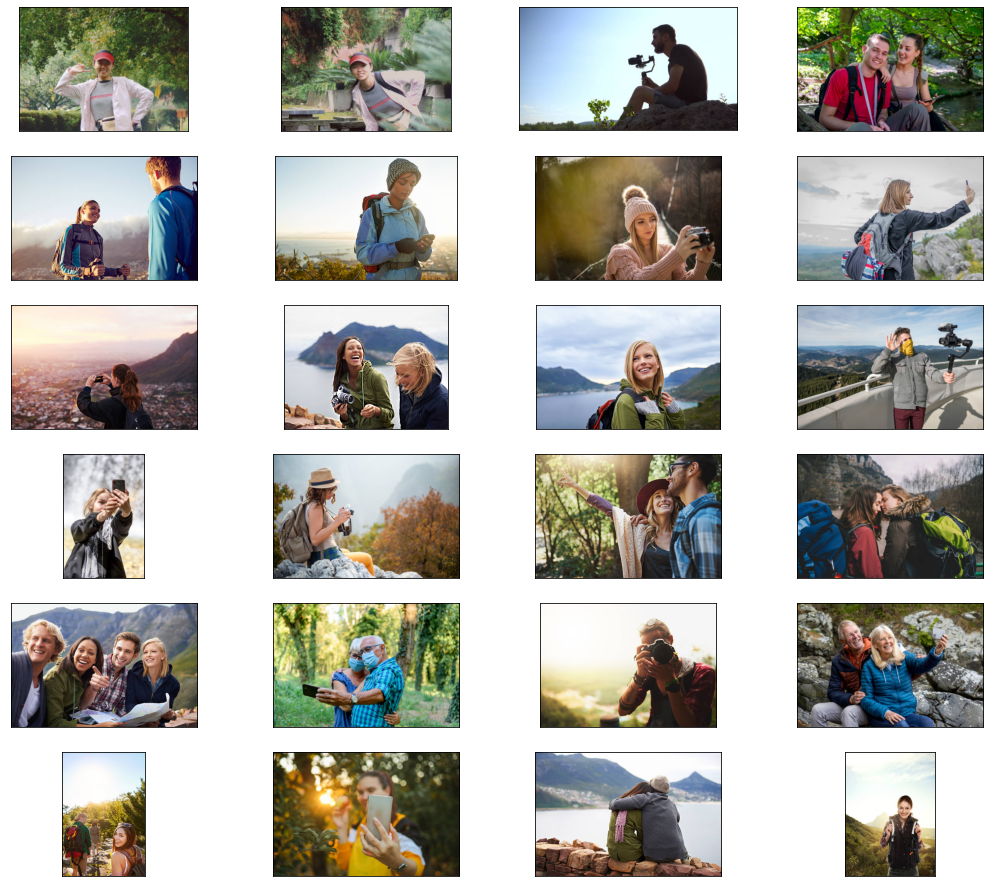

In [16]:
# 部分展示6行4列
rows, cols = 6, 4
# 500张照片的路径
image_dir = "test_imgs/test_image_500"
print("有关景物人物图像数据集的大小为: " + str(len(os.listdir(image_dir))))
print("下面为部分数据集的例子: ")
imgs = sorted(os.listdir(image_dir))[:rows * cols]

plt.figure(figsize=(18,16))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)  # 子图的索引从1开始
        image = cv2.imread(os.path.join(image_dir, imgs[i * cols + j]))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

In [2]:
def print_lines(img, points):
    img = img.copy()
    for pair in Utils.POSE_PAIRS:
        part_from = pair[0]
        part_to = pair[1]
        assert (part_from in Utils.BODY_PARTS)
        assert (part_to in Utils.BODY_PARTS)

        id_from = Utils.BODY_PARTS[part_from]
        id_to = Utils.BODY_PARTS[part_to]

        if points[id_from] and points[id_to]:
            cv2.line(img, points[id_from], points[id_to], (0, 255, 0), 3)
            cv2.ellipse(img, points[id_from], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)
            cv2.ellipse(img, points[id_to], (3, 3), 0, 0, 360, (0, 0, 255), cv2.FILLED)

    return img

In [ ]:
rows, cols = 2, 3

imgs = sorted(os.listdir('test_imgs/body/'))[:rows * cols]
plt.figure(figsize=(15,9))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

In [ ]:
plt.clf()
plt.figure(figsize=(15,9))
for i in range(rows):
    for j in range(cols):
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        points = Utils.get_pose_point(image)
        image = print_lines(image, points)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
plt.show()

In [ ]:
layout = Layout('./modules/graph_opt.pb')

for i in range(rows):
    for j in range(cols):
        print('-'*15+'image {}'.format(i * cols + j)+'-'*15)
        image = cv2.imread('test_imgs/body/' + imgs[i * cols + j])
        layout_score = layout.cal_score(image)  # 布局得分
        print('layout_score: ', layout_score)

In [ ]:
rows, cols = 1, 5
brightness = Brightness()

imgs = sorted(os.listdir('test_imgs/brightness/'))[:rows * cols]
plt.clf()
plt.figure(figsize=(15,6))
for i in range(rows):
    for j in range(cols):
        print('-'*15+'image {}'.format(i * cols + j)+'-'*15)
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/brightness/' + imgs[i * cols + j])
        brightness_score = brightness.cal_score(image)  # 亮度得分
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xlabel('brightness_score: {:.2f}'.format(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})
        plt.xticks([])
        plt.yticks([])
plt.show()

In [ ]:
image = cv2.imread('test_imgs/brightness/img0.png')
plt.clf()
plt.figure(figsize=(8,6))

plt.subplot(121)
brightness_score = brightness.cal_score(image)  # 亮度得分
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.xticks([])
plt.yticks([])
plt.xlabel('origin score: {:.2f}'.format(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})

plt.subplot(122)
adjust = brightness.opt_img(image)
adjust_rgb = cv2.cvtColor(adjust, cv2.COLOR_BGR2RGB)
brightness_score = brightness.cal_score(adjust)  # 亮度得分
plt.imshow(adjust_rgb)
plt.xlabel('adjusted score: {:.2f}'.format(brightness_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})

plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
rows, cols = 1, 5

saturation = Saturation()
imgs = sorted(os.listdir('test_imgs/brightness/'))[:rows * cols]
plt.clf()
plt.figure(figsize=(15,6))
for i in range(rows):
    for j in range(cols):
        print('-'*15+'image {}'.format(i * cols + j)+'-'*15)
        plt.subplot(rows, cols, i * cols + j + 1)
        image = cv2.imread('test_imgs/brightness/' + imgs[i * cols + j])
        saturation_score = saturation.cal_score(image)  # 对比度得分
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.xlabel('saturation_score: {:.2f}'.format(saturation_score), fontdict={'family' : 'Times New Roman', 'size'   : 10})
        plt.xticks([])
        plt.yticks([])
plt.show()